In [ ]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import LMSC_optimize
from visualizingData import *
import pandas as pd
import os
import ast

In [3]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [4]:
dense_matrix.shape

(500, 1000)

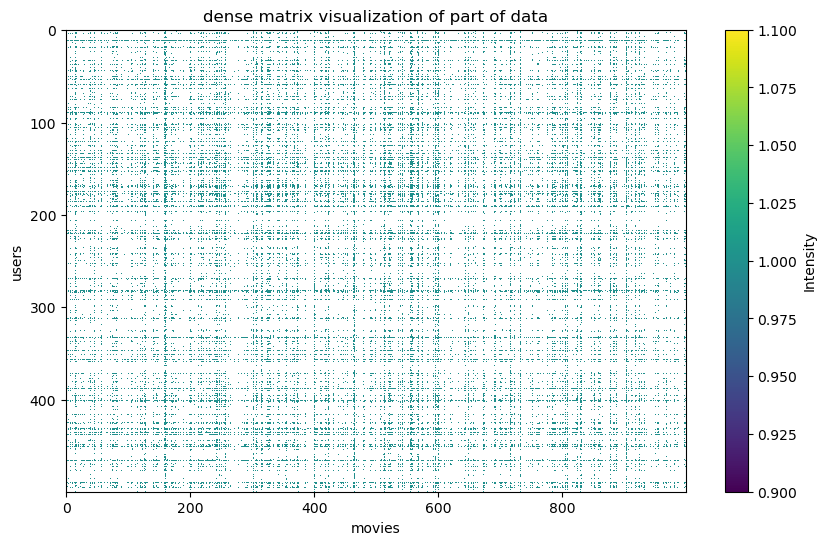

In [5]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [96]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

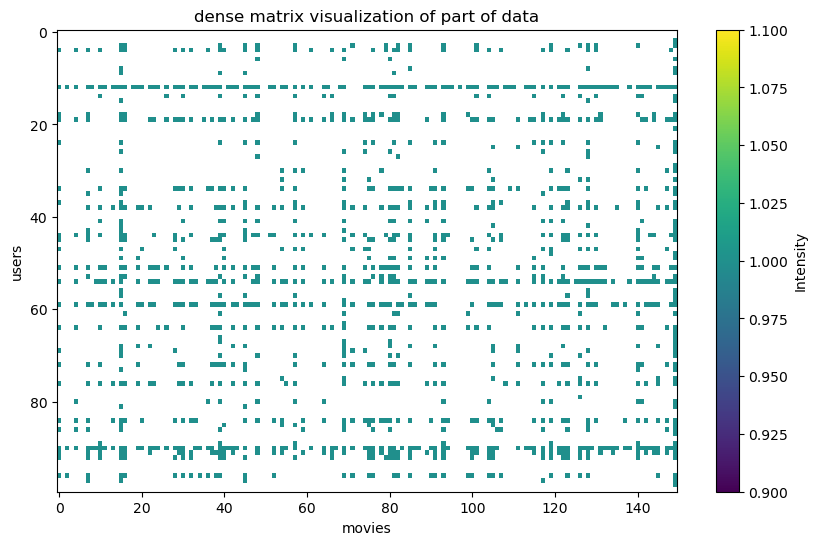

In [97]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [98]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization

# Generate rhos for each lambda
rhos = np.round(10*np.arange(.1,3.5, .1))/10

# List to store results
results = []



    
# Iterate over rho values
for rho in rhos: 
    # Iterate over lambda values
    for lambda_ in lambdas:
        # Iterate over gamma values
        
        for gamma in gammas:
            # Calculate epsilon based on matrix size and gamma
            epsilon = m * n * gamma  # Error threshold as defined in the paper
            
            # Print current parameter settings
            print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

            # Run the optimization function with the current parameters
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors = LMSC_optimize(
                rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations
            )
            
            print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}\n")
            # Store the results in a dictionary
            result = {
                'lambda': lambda_,
                'rho': rho,
                'gamma': gamma,
                'errors': errors,
                'relative_errors': r_errors
            }
            results.append(result)


Current settings: gamma = 0.0, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.1, lambda = 0.1

Current settings: gamma = 0.001, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.1, lambda = 0.1

Current settings: gamma = 0.01, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.1, lambda = 0.1

Current settings: gamma = 0.0, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.1, lambda = 0.2

Current settings: gamma = 0.001, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.1, lambda = 0.2

Current settings: gamma = 0.01, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.1, lambda = 0.2

Current settings: gamma = 0.0, rho = 0.1, lambda = 0.3
Is lambda smaller then rho?: Fals

In [99]:
# Assuming 'results' is the list you populated with dictionaries as shown earlier
results_df = pd.DataFrame(results)  # Convert the results list to a DataFrame

# Define the directory name
directory = 'convergence_results'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the DataFrame
file_path = os.path.join(directory, 'convergence_resultsv2.csv')

# Save the DataFrame as a CSV file
results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Results saved to convergence_results\convergence_resultsv2.csv


In [100]:


# Define the directory and file path
directory = 'convergence_results'
file_path = os.path.join(directory, 'convergence_results.csv')

# Load the DataFrame from the CSV file
results_df = pd.read_csv(file_path)

# Display the loaded DataFrame
print(results_df.head())  # Show the first few rows of the DataFrame


   lambda  rho  gamma                                             errors  \
0     0.1  0.1  0.000  [[2.293218333243138, 1.6369683185634096], [2.4...   
1     0.1  0.1  0.001  [[2.293218333243138, 1.6369683185634096], [2.4...   
2     0.1  0.1  0.010  [[2.293218333243138, 1.6369683185634096], [2.5...   
3     0.2  0.1  0.000  [[2.293218333243138, 1.6369683185634096], [3.2...   
4     0.2  0.1  0.001  [[2.293218333243138, 1.6369683185634096], [3.2...   

                                     relative_errors  
0  [(6.196255940319678, 2.223107278513357, 8.4193...  
1  [(6.196255940319678, 2.223107278513357, 8.4193...  
2  [(6.196255940319678, 2.223107278513357, 8.4193...  
3  [(6.196255940319678, 2.223107278513357, 8.4193...  
4  [(6.196255940319678, 2.223107278513357, 8.4193...  


In [56]:

# Suppose you have specific values for lambda, rho, and gamma
lambda_ = 0.1
rho = 0.10
gamma = 0.001
# Example of selecting errors for specific lambda, rho, and gamma
specific_errors = df_results[
    (df_results['lambda'] == lambda_) &
    (df_results['rho'] == rho) &
    (df_results['gamma'] == gamma)
]
# Convert 'errors' and 'relative_errors' columns to NumPy arrays
errors_array = specific_errors['errors'].to_numpy()[0]
relative_errors_array = specific_errors['relative_errors'].to_numpy()[0]



In [115]:
results_df[results_df['rho'] == 0.7]

,lambda,rho,gamma,errors,relative_errors


In [91]:
# Assuming your DataFrame is named df_results
rho_10_data = results_df[results_df['rho'] == 3.4]

# Display the filtered data
print(rho_10_data)


Empty DataFrame
Columns: [lambda, rho, gamma, errors, relative_errors]
Index: []


In [101]:
import ast
rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


In [102]:
last_2_errors = []
for err_list in np.array(rho_10_data['errors']):
    last_2_errors.append(err_list[-1])

In [103]:
last_2_errors

[]

In [104]:

# Convert data to a numpy array for easier slicing
data_array = np.array(last_2_errors)


# Split data into three groups for gamma values
gamma_0_data = data_array[0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [105]:
# Prepare data for three different gamma values
gamma_0_data = data_array[::3]       # Rows for gamma = 0
gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01

In [ ]:

def rhoCheckPlots(rho):
    # Assuming your DataFrame is named df_results
    rho_10_data = results_df[results_df['rho'] == rho]

    rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


    last_2_errors = []
    for err_list in np.array(rho_10_data['errors']):
        last_2_errors.append(err_list[-1])

    # Convert data to a numpy array for easier slicing
    data_array = np.array(last_2_errors)

    # Prepare data for three different gamma values
    gamma_0_data = data_array[::3]       # Rows for gamma = 0
    gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
    gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01
    

    MAE_1 = gamma_0_data[:,0]
    MAE_2 = gamma_001_data[:,0]
    MAE_3 = gamma_01_data[:,0]
    # x = lambdas
    plt.plot(lambdas,MAE_3, 'o-' ,label='gamma=0.01')
    plt.plot(lambdas,MAE_2,'o-' ,label='gamma=0.001')
    plt.plot(lambdas,MAE_1, 'o-' ,label='gamma=0')
    plt.xlabel('lambda')
    plt.ylabel('MAE')
    
    plt.title(f"MAE Error for Lambdas at rho={rho}")
    plt.legend()
    plt.show()
    
    RMSE_1 = gamma_0_data[:,1]
    RMSE_2 = gamma_001_data[:,1]
    RMSE_3 = gamma_01_data[:,1]
    # x = lambdas
    plt.plot(lambdas,RMSE_3, 'o-' ,label='gamma=0.01')
    plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    plt.xlabel('lambda')
    plt.ylabel('RMSE')
    
    plt.title(f"RMSE Error for Lambdas at rho={rho}")
    plt.legend()
    plt.show()

C:\Users\kesol\AppData\Local\Temp\ipykernel_26264\3666683517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


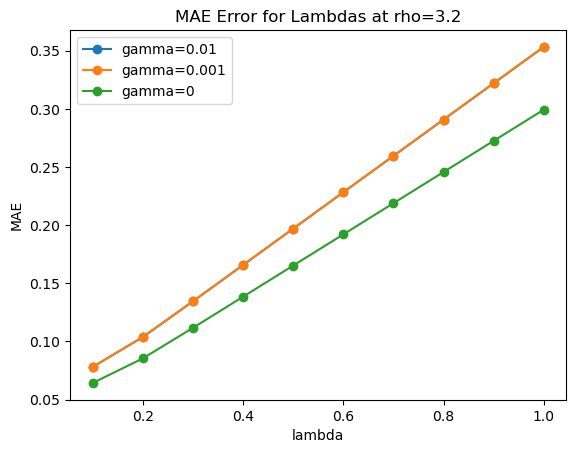

[0.06430361 0.08544816 0.11169148 0.13845165 0.16524905 0.19205176
 0.21885719 0.24566421 0.27247213 0.29928063]
[0.06479208 0.08887328 0.11471651 0.14095294 0.16736764 0.19388859
 0.22047807 0.24711435 0.27378393 0.30047806]


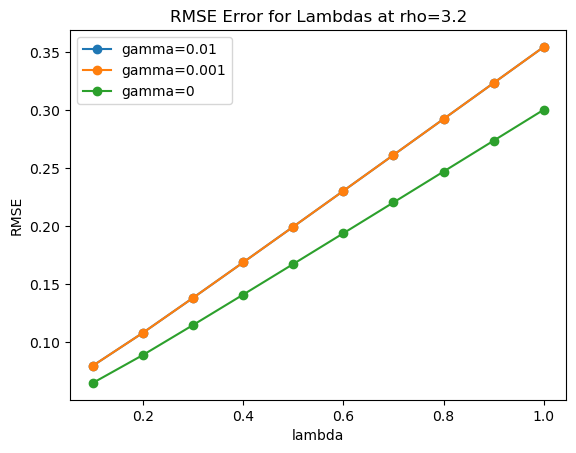

In [131]:

rhoCheckPlots(3.2)

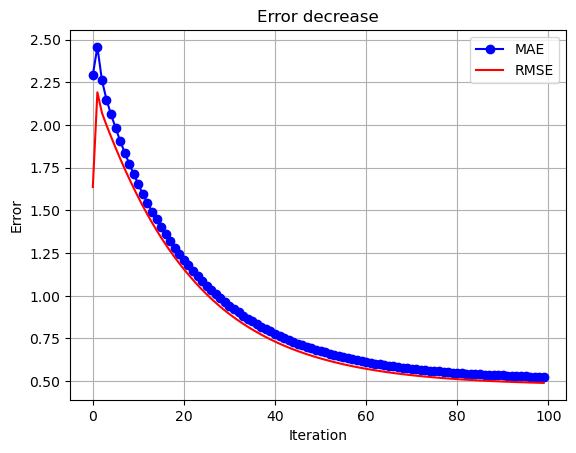

In [18]:
errorPlot(errors_array)